<a href="https://colab.research.google.com/github/spatika1504/DS5500_capstone_project/blob/main/DS5500_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random,matplotlib

In [ ]:
pip install plotly

ERROR: Operation cancelled by user


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
!pip install PyDrive

In [ ]:
import zipfile

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


Getting the data from the google drive

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
https://drive.google.com/file/d/1s30_lG0v749rkTcamDffaPvjoYYhe2MC/view?usp=sharing

In [ ]:
download = drive.CreateFile({'id': '1s30_lG0v749rkTcamDffaPvjoYYhe2MC'})
download.GetContentFile('train.csv')

In [ ]:
import datatable as dt
#!pip install datatable

Reading the crypto currency file 

In [ ]:
crypto_currency_df = dt.fread('train.csv').to_pandas()
crypto_currency_df.head(10)

timestamp  Asset_ID  Count  ...       Volume          VWAP    Target
0  1514764860         2   40.0  ...    19.233005   2373.116392 -0.004218
1  1514764860         0    5.0  ...    78.380000      8.530000 -0.014399
2  1514764860         1  229.0  ...    31.550062  13827.062093 -0.014643
3  1514764860         5   32.0  ...  6626.713370      7.657713 -0.013922
4  1514764860         7    5.0  ...   121.087310     25.891363 -0.008264
5  1514764860         6  173.0  ...   335.987856    738.839291 -0.004809
6  1514764860         9  167.0  ...   411.896642    225.197944 -0.009791
7  1514764860        11    7.0  ...     6.635710    329.454118       NaN
8  1514764920         2   53.0  ...    24.050259   2371.434498 -0.004079
9  1514764920         0    7.0  ...    71.390000      8.520215 -0.015875

[10 rows x 10 columns]

**Information on our dataset.** We have a very huge dataset. We have 24236806 rows and 10 Columns. 

In [ ]:
crypto_currency_df.info()
crypto_currency_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236806 entries, 0 to 24236805
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  int32  
 1   Asset_ID   int32  
 2   Count      float64
 3   Open       float64
 4   High       float64
 5   Low        float64
 6   Close      float64
 7   Volume     float64
 8   VWAP       float64
 9   Target     float64
dtypes: float64(8), int32(2)
memory usage: 1.6 GB


(24236806, 10)

**Asset Table**
We also read the asset information table that we have in our dataset. It includes the list of all assets. The columns it contains are the Asset_ID which is used to map the assets, and the weight of each asset used to weigh their relative importance in the evaluation metric.

The evaluation metric where these weights would be useful is to get the weighted pearson correlation coefficient evaluation metric.

In [ ]:
asset_details = pd.read_csv('asset_details.csv') 

In [ ]:
asset_details.head()

Asset_ID    Weight        Asset_Name
0         2  2.397895      Bitcoin Cash
1         0  4.304065      Binance Coin
2         1  6.779922           Bitcoin
3         5  1.386294            EOS.IO
4         7  2.079442  Ethereum Classic

In [ ]:
asset_details["Weight"].sum()

40.879847092769616

As the weight does not add upto 100. Let us see the percentage of weights given to each of the assets now.

In [ ]:
asset_details["weight_percentage"] = (asset_details["Weight"] / asset_details["Weight"].sum()) * 100
asset_details.sort_values("Weight", ascending=False)

Asset_ID    Weight        Asset_Name  weight_percentage
2          1  6.779922           Bitcoin          16.584998
5          6  5.894403          Ethereum          14.418848
10         3  4.406719           Cardano          10.779686
1          0  4.304065      Binance Coin          10.528574
13         4  3.555348          Dogecoin           8.697068
0          2  2.397895      Bitcoin Cash           5.865715
6          9  2.397895          Litecoin           5.865715
4          7  2.079442  Ethereum Classic           5.086716
9         12  2.079442           Stellar           5.086716
8         13  1.791759              TRON           4.382990
7         11  1.609438            Monero           3.936996
3          5  1.386294            EOS.IO           3.391144
11         8  1.098612              IOTA           2.687418
12        10  1.098612             Maker           2.687418

We can see that there are 14 types of assets ranging from 0 to 13 . These are now arranged in decreasing value of their weight. We can observe from here that "Bitcoin" has the most weightage and the asset "Maker" has the least weight. 

In [ ]:
fig = px.pie(asset_details, values='weight_percentage', names='Asset_Name', title='Weights given to each cryptocurrency')
fig.show()

### Data Pre-Processing

###### We would start our pre processing by cleaning the data. To clean the data we would check for missing and infinite values

###### **Check Missing Values**

In [ ]:
print("NA Counts for each Asset : ")
print("\n")
for i in range(0,14):
    print("Asset_ID =",i)
    crypto_number = crypto_currency_df[crypto_currency_df["Asset_ID"]==i]
    print(crypto_number.isna().sum())
    print('')

NA Counts for each Asset : 


Asset_ID = 0
timestamp        0
Asset_ID         0
Count            0
Open             0
High             0
Low              0
Close            0
Volume           0
VWAP             0
Target       13415
dtype: int64

Asset_ID = 1
timestamp      0
Asset_ID       0
Count          0
Open           0
High           0
Low            0
Close          0
Volume         0
VWAP           0
Target       304
dtype: int64

Asset_ID = 2
timestamp       0
Asset_ID        0
Count           0
Open            0
High            0
Low             0
Close           0
Volume          0
VWAP            0
Target       4861
dtype: int64

Asset_ID = 3
timestamp        0
Asset_ID         0
Count            0
Open             0
High             0
Low              0
Close            0
Volume           0
VWAP             0
Target       18731
dtype: int64

Asset_ID = 4
timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0

*   The missing data in the Target column only.
*  Bitcoin has the least number of missing target values and Monero the most.




##### **Check for Infinite Values**

In [ ]:
print("Inf Counts for each Asset : ")
print("\n")
for i in range(0,14):
    print("Asset_ID =",i)
    crypto_number = crypto_currency_df[crypto_currency_df["Asset_ID"]==i]
    print(crypto_number.isin([np.inf, -np.inf]).sum())
    print('')

Inf Counts for each Asset : 


Asset_ID = 0
timestamp    0
Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0
Target       0
dtype: int64

Asset_ID = 1
timestamp    0
Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0
Target       0
dtype: int64

Asset_ID = 2
timestamp    0
Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0
Target       0
dtype: int64

Asset_ID = 3
timestamp    0
Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0
Target       0
dtype: int64

Asset_ID = 4
timestamp    0
Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0
Target       0
dtype: int64

Asset_ID = 5
timestamp    0
Asset_ID     0
Count        0
Open         0
High       

In [ ]:
print(f'Inf count: \n{crypto_currency_df.isin([np.inf, -np.inf]).sum()}')

Inf count: 
timestamp    0
Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         7
Target       0
dtype: int64


We can see that only asset Id 10 (Maker) has 7 infinite values 

##### **Check for Duplicate Values**

In [ ]:
print(crypto_currency_df.duplicated().sum())

0


There is no duplicated appointments record in this data set.

##### **Check for Missing Gap in Assets**

It is also mentioned in the competition that missing asset data, for a given minute, is not represented by NaN's, but instead by the absence of those rows. 

We can check the timestamp difference between consecutive rows to see if there is missing data.

So let us check the gaps in the data.



In [ ]:
asset_details['Name'] = asset_details['Asset_Name'].str.replace(" ","_")

In [ ]:
asset_details.head()

Asset_ID    Weight        Asset_Name  weight_percentage              Name
0         2  2.397895      Bitcoin Cash           5.865715      Bitcoin_Cash
1         0  4.304065      Binance Coin          10.528574      Binance_Coin
2         1  6.779922           Bitcoin          16.584998           Bitcoin
3         5  1.386294            EOS.IO           3.391144            EOS.IO
4         7  2.079442  Ethereum Classic           5.086716  Ethereum_Classic

In [ ]:
from datetime import datetime
import time
from datetime import datetime

###### Checking Time Range

In [ ]:
dict1={}
for i in range(14):
    dict1[asset_details[asset_details['Asset_ID']==i]['Name'].values[0]] = crypto_currency_df[crypto_currency_df["Asset_ID"]==i].set_index("timestamp") 
    beg = datetime.fromtimestamp(dict1[asset_details[asset_details['Asset_ID']==i]['Name'].values[0]].index[0]).strftime("%A, %B %d, %Y %I:%M:%S") 
    end = datetime.fromtimestamp(dict1[asset_details[asset_details['Asset_ID']==i]['Name'].values[0]].index[-1]).strftime("%A, %B %d, %Y %I:%M:%S") 
    print(asset_details[asset_details['Asset_ID']==i]['Name'].values[0],'data goes from ', beg, ' to ', end) 

Binance_Coin data goes from  Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 2021 12:00:00
Bitcoin data goes from  Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 2021 12:00:00
Bitcoin_Cash data goes from  Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 2021 12:00:00
Cardano data goes from  Tuesday, April 17, 2018 09:11:00  to  Tuesday, September 21, 2021 12:00:00
Dogecoin data goes from  Friday, April 12, 2019 02:34:00  to  Tuesday, September 21, 2021 12:00:00
EOS.IO data goes from  Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 2021 12:00:00
Ethereum data goes from  Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 2021 12:00:00
Ethereum_Classic data goes from  Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 2021 12:00:00
IOTA data goes from  Wednesday, May 09, 2018 08:07:00  to  Tuesday, September 21, 2021 12:00:00
Litecoin data goes from  Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 

**Inference:**

*   The earliest start date in the data is Jan 1, 2018 and most coins have that start datetime.
*   The data is available till Sep 21, 2021 and all the coins have the same end datetime.
*   Dogecoin has the least historical information available of the given coins and is captured onlt from April 2019.
*   Many other assets like cardano, Maker , IOTA data is not available from January 1


In [ ]:
# creating a dictionary of asset Names
asset_names_dict = {row["Asset_Name"]:row["Asset_ID"] for ind, row in asset_details.iterrows()}

asset_names = [
    'Bitcoin',
    'Ethereum',
    'Cardano',
    'Binance Coin',
    'Dogecoin',
    'Bitcoin Cash',
    'Litecoin',
    'Ethereum Classic',
    'Stellar',
    'TRON',
    'Monero',
    'EOS.IO',
    'IOTA',
    'Maker'
]


In [ ]:
# To check how many target values and other column values are missing for each of the assets to understand the time stamps being missing. 
missing_list = []
for coin in asset_names:
    coin_df = crypto_currency_df[crypto_currency_df["Asset_ID"]==asset_names_dict[coin]].set_index("timestamp")
    missing_list.append([coin, coin_df.shape[0]] + coin_df.isna().sum().tolist())
missing_df = pd.DataFrame(missing_list)
missing_df.columns = ["Asset_Name", "TotalRows", 'Missing_Asset_ID', 'Missing_Count', 'Missing_Open', 
                      'Missing_High', 'Missing_Low', 'Missing_Close', 'Missing_Volume', 'Missing_VWAP', 'Missing_Target']
missing_df

Asset_Name  TotalRows  ...  Missing_VWAP  Missing_Target
0            Bitcoin    1956282  ...             0             304
1           Ethereum    1956200  ...             0             340
2            Cardano    1791867  ...             0           18731
3       Binance Coin    1942619  ...             0           13415
4           Dogecoin    1156866  ...             0          144974
5       Bitcoin Cash    1953537  ...             0            4861
6           Litecoin    1956030  ...             0             521
7   Ethereum Classic    1951127  ...             0            9326
8            Stellar    1778749  ...             0           61816
9               TRON    1874560  ...             0           21014
10            Monero    1701261  ...             0          239603
11            EOS.IO    1955140  ...             0            2302
12              IOTA    1592071  ...             0          193106
13             Maker     670497  ...             9           40025

[14 rows x 11 columns]

We can see that all the assets is having less than the number of rows it is required to have. The total rows it should have is one for each minute starting from Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 2021 12:00:00,.

We know that the data is collected once every 60 seconds. If we have a gap of more than one minute between consecutive rows, then it indicates that the data is missing in between. Let us check that for each of the coins.



In [ ]:
# checking how many time gaps are there and how many seconds are missing
gap_list = []
for coin in asset_details['Asset_Name']:
    coin_df = crypto_currency_df[crypto_currency_df["Asset_ID"]==asset_names_dict[coin]].set_index("timestamp")
    gap_df = (coin_df.index[1:]-coin_df.index[:-1]).value_counts().reset_index()
    n_gaps = gap_df[gap_df["index"]!=60]["timestamp"].sum()
    max_gap = gap_df["index"].max()
    gap_list.append([coin, n_gaps, max_gap])
gap_df = pd.DataFrame(gap_list)
gap_df.columns = ["Asset_Name", "number_of_gaps", "max_gap_in_seconds"]
gap_df

Asset_Name  number_of_gaps  max_gap_in_seconds
0       Bitcoin Cash            2502                4380
1       Binance Coin            6600              120720
2            Bitcoin             145                2400
3             EOS.IO            1188                3960
4   Ethereum Classic            4707                3780
5           Ethereum             156                7200
6           Litecoin             291                5280
7             Monero          131837                3180
8               TRON           12225                3000
9            Stellar           37770                8520
10           Cardano            9360                4800
11              IOTA          107741               10920
12             Maker           26497              281700
13          Dogecoin           76652                7260

**Inference:**

There are several gaps in the dataset and we need to treat them carefully.

Maker coin has the maximum gap of 281700 seconds or about 78 hours.

When we have gaps in the data, we can't compute the returns for the time period that comes just after these gaps. I think that is the reason we have missing target values in our data.


To work with most time series models, we should preprocess our data into a format without time gaps.

To fill the gaps, we can use the .reindex() method for forward filling, filling gaps with the previous valid value.



We see that we have instances where two consecutive entries are 120 seconds apart, instead of 60 sec, and so on.

Because the gaps in data are so small, we can use a simple imputation method: fill in the missing data with the value from the most recent available minute.

This is what the method = 'pad' parameter of the reinde function below does.



In [ ]:
import time

# auxiliary function, from datetime to timestamp
totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))


In [ ]:
# define function to compute log returns
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

In [ ]:
# create dataframe with returns for all assets for the year 2021
all_assets_2021 = pd.DataFrame([])
for asset_id, asset_name in zip(asset_details.Asset_ID, asset_details.Asset_Name):
  asset = crypto_currency_df[crypto_currency_df["Asset_ID"]==asset_id].set_index("timestamp")
  asset = asset.loc[totimestamp('01/01/2021'):totimestamp('01/05/2021')]
  asset = asset.reindex(range(asset.index[0],asset.index[-1]+60,60),method='pad')
  lret = log_return(asset.Close.fillna(0))[1:]
  all_assets_2021 = all_assets_2021.join(lret, rsuffix=asset_name, how="outer")

Indivual crypto currency data handling for missing values

In [ ]:
# handling etherium seperately to solve for missing values
eth = crypto_currency_df[crypto_currency_df["Asset_ID"]==6].set_index("timestamp") # Asset_ID = 6 for Ethereum
eth = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method='pad')
(eth.index[1:]-eth.index[:-1]).value_counts().head()

60    1956959
Name: timestamp, dtype: int64

In [ ]:
# handling bitcoin seperately to solve for missing values
btc = crypto_currency_df[crypto_currency_df["Asset_ID"]==1].set_index("timestamp") # Asset_ID = 1 for Bitcoin
btc = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method='pad')
(btc.index[1:]-btc.index[:-1]).value_counts().head()

60    1956959
Name: timestamp, dtype: int64

Instead of having the index as timestamp, converting the index to datetime format for the ease of doing time series analysis. 

In [ ]:
btc['datetime'] = btc.apply(lambda r: np.float64(r.name).astype('datetime64[s]'), axis=1)

btc.set_index('datetime', inplace=True);

btc.head(3)

Asset_ID  Count  ...          VWAP    Target
datetime                              ...                        
2018-01-01 00:01:00         1  229.0  ...  13827.062093 -0.014643
2018-01-01 00:02:00         1  235.0  ...  13840.362591 -0.015037
2018-01-01 00:03:00         1  528.0  ...  13806.068014 -0.010309

[3 rows x 9 columns]

In [ ]:
eth['datetime'] = eth.apply(lambda r: np.float64(r.name).astype('datetime64[s]'), axis=1)

eth.set_index('datetime', inplace=True);

eth.head(3)

Asset_ID  Count  ...        VWAP    Target
datetime                              ...                      
2018-01-01 00:01:00         6  173.0  ...  738.839291 -0.004809
2018-01-01 00:02:00         6  192.0  ...  738.268967 -0.004441
2018-01-01 00:03:00         6  120.0  ...  737.994457 -0.004206

[3 rows x 9 columns]

In this code walk, we will simplify things and use correlation (without weights) for evaluation, and consider only two assets, BTC and ETH.

##### **Feature Engineering**

We want to make the data ready to apply a supervised machine learning model. So we want to make our data such a way that each row has several features and a label / value that we're trying to predict based on those features. Here our label/Value would be the 'target' variable. 

We can first use Date Time features for our feature engineering. For our date time features we can transform the timestamp into day, hour, min. This way we would be creating three new features.This would also be useful in here if we're trying to predict the price for a specific time on a specific day.

In [ ]:
btc['time'] = btc.apply(lambda r:r.name, axis=1) # moving timestamp back into a column


In [ ]:
# and parse it into year, month, day and hour
btc['year'] = [btc.iloc[i].time.year for i in range(len(btc))]  
btc['month'] = [btc.iloc[i].time.month for i in range(len(btc))]
btc['day'] = [btc.iloc[i].time.day for i in range(len(btc))]
btc['hour'] = [btc.iloc[i].time.hour for i in range(len(btc))]

In [ ]:
eth['time'] = eth.apply(lambda r:r.name, axis=1) # moving timestamp back into a column


In [ ]:
# and parse it into year, month, day and hour
eth['year'] = [eth.iloc[i].time.year for i in range(len(eth))]  
eth['month'] = [eth.iloc[i].time.month for i in range(len(eth))]
eth['day'] = [eth.iloc[i].time.day for i in range(len(eth))]
eth['hour'] = [eth.iloc[i].time.hour for i in range(len(eth))]

Using only the 2021 data for modelling; so splitting the data to include only 2021 data till May 2021. 

In [ ]:
btc_2021=btc[datetime(2021,1,1):datetime(2021,5,1)]

In [ ]:
eth_2021=eth[datetime(2021,1,1):datetime(2021,5,1)]

In [ ]:
# average data per hour 
tmp = btc.groupby(['year', 'month', 'day', 'hour']).mean()

# restore the multilevel index created by groupby into the year, month, day, hour columns that we created earlier
tmp.reset_index(inplace=True)

In [ ]:
cols = ['year', 'month', 'day', 'hour', 'Close']

tmp[cols].head(5)

In [ ]:
# Select some input features from the trading data: 
# 5 min log return, abs(5 min log return), upper shadow, and lower shadow.
upper_shadow = lambda asset: asset.High - np.maximum(asset.Close,asset.Open)
lower_shadow = lambda asset: np.minimum(asset.Close,asset.Open)- asset.Low

X_btc = pd.concat([log_return(btc_2021.VWAP,periods=5), log_return(btc_2021.VWAP,periods=5).abs(), 
               upper_shadow(btc_2021), lower_shadow(btc_2021),btc_2021.month,btc_2021.day,btc_2021.hour], axis=1)
y_btc = btc_2021.Target

X_eth = pd.concat([log_return(eth_2021.VWAP,periods=5), log_return(eth_2021.VWAP,periods=1).abs(), 
               upper_shadow(eth_2021), lower_shadow(eth_2021),eth_2021.month,eth_2021.day,eth_2021.hour], axis=1)
y_eth = eth_2021.Target

In [ ]:
etc_new_df=etc_new_df.drop(['Date','Date.1','diff_1'],axis=1)
btc_new_df=btc_new_df.drop(['Date','Date.1','diff_1'],axis=1)

In [ ]:
X_etc=pd.concat([log_return(etc_new_df.VWAP,periods=5), log_return(etc_new_df.VWAP,periods=5).abs(),etc_new_df.Count,etc_new_df.Open,etc_new_df.High,etc_new_df.Low,etc_new_df.Close,etc_new_df.Volume,etc_new_df.Upper_Shadow,etc_new_df.Lower_Shadow,etc_new_df.spread,etc_new_df.mean_trade,etc_new_df.log_price_change],axis=1)

In [ ]:
y_etc = etc_new_df.Target

In [ ]:
X_btc=pd.concat([log_return(btc_new_df.VWAP,periods=5), log_return(btc_new_df.VWAP,periods=5).abs(),btc_new_df.Count,btc_new_df.Open,btc_new_df.High,btc_new_df.Low,btc_new_df.Close,btc_new_df.Volume,btc_new_df.Upper_Shadow,btc_new_df.Lower_Shadow,btc_new_df.spread,btc_new_df.mean_trade,btc_new_df.log_price_change],axis=1)

In [ ]:
y_btc = btc_new_df.Target

In [ ]:
# not running this now- features collected for later
def upper_shadow(df):
    return df["High"] - np.maximum(df["Close"], df["Open"])

def lower_shadow(df):
    return np.minimum(df["Close"], df["Open"]) - df["Low"]
def get_features(dataframe, row=False):
    df_feat = dataframe.copy()
    
    df_feat["Upper_Shadow"] = upper_shadow(df_feat)
    df_feat["Lower_Shadow"] = lower_shadow(df_feat)

    ## Adding some more features
    df_feat["Close/Open"] = df_feat["Close"] / df_feat["Open"] 
    df_feat["Close-Open"] = df_feat["Close"] - df_feat["Open"] 
    df_feat["High-Low"] = df_feat["High"] - df_feat["Low"] 
    df_feat["High/Low"] = df_feat["High"] / df_feat["Low"]
    
    if row:
        df_feat['Mean'] = df_feat[['Open', 'High', 'Low', 'Close']].mean()
    else:
        df_feat['Mean'] = df_feat[['Open', 'High', 'Low', 'Close']].mean(axis=1)

    df_feat["High/Mean"] = df_feat["High"] / df_feat["Mean"]
    df_feat["Low/Mean"] = df_feat["Low"] / df_feat["Mean"]
    df_feat["Volume/Count"] = df_feat["Volume"] / (df_feat["Count"] + 1)

    times = pd.to_datetime(df_feat["timestamp"],unit="s",infer_datetime_format=True)
    if row:
        df_feat["hour"] = times.hour  # .dt
        df_feat["dayofweek"] = times.dayofweek 
        df_feat["day"] = times.day 
    else:
        df_feat["hour"] = times.dt.hour  # .dt
        df_feat["dayofweek"] = times.dt.dayofweek 
        df_feat["day"] = times.dt.day 
    
    if row:
        df_feat["Median"] = df_feat[["Open", "High", "Low", "Close"]].median()
    else:
        df_feat["Median"] = df_feat[["Open", "High", "Low", "Close"]].median(axis=1)
    df_feat["High/Median"] = df_feat["High"] / df_feat["Median"]
    df_feat["Low/Median"] = df_feat["Low"] / df_feat["Median"]

    for col in ['Open', 'High', 'Low', 'Close', 'VWAP']:
        df_feat[f"Log_1p_{col}"] = np.log1p(df_feat[col])
        
    if row:
        df_feat.drop(['row_id', 'Asset_ID'], inplace=True)
    else:
        df_feat.drop(['Asset_ID'], axis=1, inplace=True)
    
    return df_feat

**Preparing the data for building predictive models**

As we will train ML alogirithm parameters, we need to separate training and test sets. To do so, we will compute X and y and split this data into train and test splits. Note that the test split represents a later part of the data, as it is commonly done in time series.

In [ ]:
# select training and test periods
train_window = [totimestamp("01/01/2021"), totimestamp("30/03/2021")]
test_window = [totimestamp("01/04/2021"), totimestamp("30/04/2021")]

# divide data into train and test, compute X and y
# we aim to build simple regression models using a window_size of 1
X_btc_train = X_btc[datetime(2021,1,1):datetime(2021,3,30)].fillna(0).to_numpy()  # filling NaN's with zeros
y_btc_train = y_btc[datetime(2021,1,1):datetime(2021,3,30)].fillna(0).to_numpy()  

X_btc_test = X_btc[datetime(2021,4,1):datetime(2021,4,30)].fillna(0).to_numpy() 
y_btc_test = y_btc[datetime(2021,4,1):datetime(2021,4,30)].fillna(0).to_numpy() 

X_eth_train = X_eth[datetime(2021,1,1):datetime(2021,3,30)].fillna(0).to_numpy()  
y_eth_train = y_eth[datetime(2021,1,1):datetime(2021,3,30)].fillna(0).to_numpy()  

X_eth_test = X_eth[datetime(2021,4,1):datetime(2021,4,30)].fillna(0).to_numpy() 
y_eth_test = y_eth[datetime(2021,4,1):datetime(2021,4,30)].fillna(0).to_numpy() 

In [ ]:
#last 10% of the data are used as validation set
X_btc_train, X_btc_test = X_btc[:-len(X_btc)//10], X_btc[-len(X_btc)//10:]
y_btc_train, y_btc_test = y_btc[:-len(y_btc)//10], y_btc[-len(y_btc)//10:]

In [ ]:
X_btc_train = X_btc_train.fillna(0).to_numpy()  # filling NaN's with zeros
y_btc_train = y_btc_train.fillna(0).to_numpy()  

X_btc_test = X_btc_test.fillna(0).to_numpy() 
y_btc_test = y_btc_test.fillna(0).to_numpy() 

In [ ]:
#last 10% of the data are used as validation set
X_etc_train, X_etc_test = X_etc[:-len(X_etc)//10], X_etc[-len(X_etc)//10:]
y_etc_train, y_etc_test = y_etc[:-len(y_etc)//10], y_etc[-len(y_etc)//10:]

In [ ]:
X_etc_train = X_etc_train.fillna(0).to_numpy()  # filling NaN's with zeros
y_etc_train = y_etc_train.fillna(0).to_numpy()  

X_etc_test = X_etc_test.fillna(0).to_numpy() 
y_etc_test = y_etc_test.fillna(0).to_numpy() 

In [ ]:
X_etc_test.shape

(37842, 13)

In [ ]:
y_etc_train=y_etc_train[:201194]
X_etc_train=X_etc_train[:201194]

In [ ]:
y_etc_test=y_etc_test[:22355]
X_etc_test=X_etc_test[:22355]

In [ ]:
X_btc_train.shape

(340578, 13)

We now standardize the input data. Standardization is the process of putting different variables on the same scale. In regression analysis, it is often crucial to standardize your independent variables or you may risk obtaining misleading results.

In [ ]:
from sklearn.preprocessing import StandardScaler
# simple preprocessing of the data 
scaler = StandardScaler()

X_btc_train_scaled = scaler.fit_transform(X_btc_train)
X_btc_test_scaled = scaler.transform(X_btc_test)

X_eth_train_scaled = scaler.fit_transform(X_etc_train)
X_eth_test_scaled = scaler.transform(X_etc_test)

**Baseline model: Linear Regression**


We will try a simple Linear Regression model on the features we designed. Note that Linear Regression is not commonly used in time series analysis, specially with only one time step! We would be using more adavanced ML algorithms later in our project.

We compare two Linear Regression baselines, one that considers each asset independently and one multiple inputs that models all assets together. In our case for now we are considering eth and btc only. 

In [ ]:
from sklearn.linear_model import LinearRegression

# implement basic ML baseline (one per asset)
lr = LinearRegression()
lr.fit(X_btc_train_scaled,y_btc_train)
y_pred_lr_btc = lr.predict(X_btc_test_scaled)

lr.fit(X_eth_train_scaled,y_etc_train)
y_pred_lr_eth = lr.predict(X_eth_test_scaled)

**Multiple Output Linear Regression**

In [ ]:
# implement more complex baseline (multiple input/output regression model)
from sklearn.multioutput import MultiOutputRegressor

# we concatenate X and y for both assets
X_both_train = np.concatenate((X_btc_train_scaled, X_eth_train_scaled), axis=1)
X_both_test = np.concatenate((X_btc_test_scaled, X_eth_test_scaled), axis=1)
y_both_train = np.column_stack((y_btc_train, y_etc_train))
y_both_test = np.column_stack((y_btc_test, y_etc_test))

# define the direct multioutput model and fit it
mlr = MultiOutputRegressor(LinearRegression())
mlr.fit(X_both_train,y_both_train)
y_pred_lr_both = mlr.predict(X_both_test)

**Evaluate baselines**


The competition performance metric is weighted correlation. However, for now we will use simple correlation to evaluate the two baseline models built.

In [ ]:
print('Test score for LR baseline: BTC', f"{np.corrcoef(y_pred_lr_btc, y_btc_test)[0,1]:.2f}", 
                                ', ETH', f"{np.corrcoef(y_pred_lr_eth, y_etc_test)[0,1]:.2f}")
print('Test score for multiple output LR baseline: BTC', f"{np.corrcoef(y_pred_lr_both[:,0], y_btc_test)[0,1]:.2f}", 
                                                ', ETH', f"{np.corrcoef(y_pred_lr_both[:,1], y_etc_test)[0,1]:.2f}")

Test score for LR baseline: BTC 0.11 , ETH 0.01
Test score for multiple output LR baseline: BTC 0.06 , ETH 0.03


BTC LR METRICS

In [ ]:
regression_metrics(y_btc_test, y_pred_lr_btc)

MAE:  0.0009
MSE:  0.0
RMSE:  0.0012980592
MAPE:  1.33586


In [233]:
# Visualizing the results for Linear reg
fig = go.Figure()
fig.add_trace(go.Scatter(x=pd.DataFrame(y_btc_test).index, y=y_btc_test,
                    mode='lines',
                    name='True'))
fig.add_trace(go.Scatter(x=pd.DataFrame(y_pred_lr_btc).index, y=y_pred_lr_btc,
                    mode='lines',
                    name='Predicted'))
fig.update_layout(
    title="Linear Regression Performance for BTC")
fig.show(renderer="colab")

In [ ]:
del y_pred_lr_btc, lr

ETC LR METRICS

In [ ]:
regression_metrics(y_etc_test, y_pred_lr_eth)

MAE:  0.00127
MSE:  0.0
RMSE:  0.0018256269
MAPE:  1.06909


In [234]:
# Visualizing the results for Linear reg
fig = go.Figure()
fig.add_trace(go.Scatter(x=pd.DataFrame(y_etc_test).index, y=y_etc_test,
                    mode='lines',
                    name='True'))
fig.add_trace(go.Scatter(x=pd.DataFrame(y_pred_lr_eth).index, y=y_pred_lr_eth,
                    mode='lines',
                    name='Predicted'))
fig.update_layout(
    title="Linear Regression Performance for ETC")
fig.show(renderer="colab")

We can see that, for the training and test periods selected, the multiple asset LR model performs slightly bad than simply modelling each asset separately. Note that because the data is highly non-stationary, these results might vary a lot for different periods.



**Looking further at Bitcoin and Etherium for Modeling**

In [ ]:
etc_new_df=pd.read_csv('eth_2021_stationary.csv')

In [ ]:
etc_new_df

In [ ]:
btc_new_df=pd.read_csv('btc_2021_stationary.csv')

In [ ]:
# handling etherium seperately to solve for missing values
etc_new_df = etc_new_df[etc_new_df["Asset_ID"]==6].set_index("timestamp") # Asset_ID = 6 for Ethereum
etc_new_df = etc_new_df.reindex(range(etc_new_df.index[0],etc_new_df.index[-1]+60,60),method='pad')
(etc_new_df.index[1:]-etc_new_df.index[:-1]).value_counts().head()

60    378419
Name: timestamp, dtype: int64

In [ ]:
etc_new_df.index[1]

1

In [ ]:
# handling bitcoin seperately to solve for missing values
btc_new_df = btc_new_df[btc_new_df["Asset_ID"]==1].set_index("timestamp") # Asset_ID = 1 for Bitcoin
btc_new_df = btc_new_df.reindex(range(btc_new_df.index[0],btc_new_df.index[-1]+60,60),method='pad')
(btc_new_df.index[1:]-btc_new_df.index[:-1]).value_counts().head()

60    378419
Name: timestamp, dtype: int64

In [ ]:
btc_range = btc_new_df.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.
btc_range.head()

Date  Asset_ID   Count          Open  \
timestamp                                                              
1622860200  Fri Jun  4 22:30:00 2021         1  1753.0  37510.474213   
1622860260  Fri Jun  4 22:31:00 2021         1  2452.0  37524.840000   
1622860320  Fri Jun  4 22:32:00 2021         1  5060.0  37459.345714   
1622860380  Fri Jun  4 22:33:00 2021         1  1977.0  37403.051208   
1622860440  Fri Jun  4 22:34:00 2021         1  1795.0  37388.980000   

                High       Low         Close      Volume          VWAP  \
timestamp                                                                
1622860200  37549.60  37486.66  37526.500000   88.197710  37518.310746   
1622860260  37535.00  37438.14  37459.463964  105.249621  37489.882060   
1622860320  37483.54  37336.11  37397.338523  190.719180  37396.174335   
1622860380  37446.78  37352.69  37389.180926   75.972329  37402.545622   
1622860440  37462.07  37371.73  37430.915756   51.888404  37411.224462   

              Target                    Date.1     diff_1  
timestamp                                                  
1622860200  0.000236  Fri Jun  4 22:30:00 2021  16.889590  
1622860260  0.000340  Fri Jun  4 22:31:00 2021 -67.036036  
1622860320  0.000287  Fri Jun  4 22:32:00 2021 -62.125441  
1622860380  0.000352  Fri Jun  4 22:33:00 2021  -8.157597  
1622860440  0.000192  Fri Jun  4 22:34:00 2021  41.734829

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=btc_range.index, 
                                     open=btc_range['Open'], 
                                     high=btc_range['High'], 
                                     low=btc_range['Low'], 
                                     close=btc_range['Close'])])
print('Use the slider to Adjust and Zoom')
fig.update_layout(
    title="Plot Candlestick for BTC")
fig.show()

Use the slider to Adjust and Zoom


In [ ]:
eth_range = etc_new_df.iloc[-500:]  # Since we cannot plot the entire btc, so selecting the latest 500 points.


fig = go.Figure(data=[go.Candlestick(x=eth_range.index, 
                                     open=eth_range['Open'], 
                                     high=eth_range['High'], 
                                     low=eth_range['Low'], 
                                     close=eth_range['Close'])])

fig.update_layout(
    title="Plot Candlestick for ETH")
fig.show()

In [ ]:
def upper_shadow(df):
    return df["High"] - np.maximum(df["Close"], df["Open"])

def lower_shadow(df):
    return np.minimum(df["Close"], df["Open"]) - df["Low"]

In [ ]:
def get_features(dataframe, row=False):
    df_feat = dataframe.copy()
    
    df_feat["Upper_Shadow"] = upper_shadow(df_feat)
    df_feat["Lower_Shadow"] = lower_shadow(df_feat)

    ## Adding some more features
    df_feat["Close/Open"] = df_feat["Close"] / df_feat["Open"] 
    df_feat["Close-Open"] = df_feat["Close"] - df_feat["Open"] 
    df_feat["High-Low"] = df_feat["High"] - df_feat["Low"] 
    df_feat["High/Low"] = df_feat["High"] / df_feat["Low"]
    
    if row:
        df_feat['Mean'] = df_feat[['Open', 'High', 'Low', 'Close']].mean()
    else:
        df_feat['Mean'] = df_feat[['Open', 'High', 'Low', 'Close']].mean(axis=1)

    df_feat["High/Mean"] = df_feat["High"] / df_feat["Mean"]
    df_feat["Low/Mean"] = df_feat["Low"] / df_feat["Mean"]
    df_feat["Volume/Count"] = df_feat["Volume"] / (df_feat["Count"] + 1)

    times = pd.to_datetime(df_feat["timestamp"],unit="s",infer_datetime_format=True)
    if row:
        df_feat["hour"] = times.hour  # .dt
        df_feat["dayofweek"] = times.dayofweek 
        df_feat["day"] = times.day 
    else:
        df_feat["hour"] = times.dt.hour  # .dt
        df_feat["dayofweek"] = times.dt.dayofweek 
        df_feat["day"] = times.dt.day 
    
    if row:
        df_feat["Median"] = df_feat[["Open", "High", "Low", "Close"]].median()
    else:
        df_feat["Median"] = df_feat[["Open", "High", "Low", "Close"]].median(axis=1)
    df_feat["High/Median"] = df_feat["High"] / df_feat["Median"]
    df_feat["Low/Median"] = df_feat["Low"] / df_feat["Median"]

    for col in ['Open', 'High', 'Low', 'Close', 'VWAP']:
        df_feat[f"Log_1p_{col}"] = np.log1p(df_feat[col])
        
    if row:
        df_feat.drop(['row_id', 'Asset_ID'], inplace=True)
    else:
        df_feat.drop(['Asset_ID'], axis=1, inplace=True)
    
    return df_feat

In [ ]:
etc_new_df.shape

(378420, 12)

In [ ]:
etc_new_df[['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP','Target']] = \
etc_new_df[['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP','Target']].astype(np.float32)

etc_new_df.head(1)

Date  Asset_ID  Count       Open       High  \
timestamp                                                                     
1609477260  Fri Jan  1 00:01:00 2021         6  377.0  743.43573  744.51001   

                   Low       Close      Volume        VWAP    Target  \
timestamp                                                              
1609477260  742.330017  743.294312  494.370789  743.472656  0.001093   

                              Date.1    diff_1  
timestamp                                       
1609477260  Fri Jan  1 00:01:00 2021 -0.064286

In [ ]:
btc_new_df[['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP','Target']] = \
btc_new_df[['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP','Target']].astype(np.float32)

btc_new_df.head(10)

Date  Asset_ID   Count          Open  \
timestamp                                                              
1609477260  Fri Jan  1 00:01:00 2021         1  1199.0  29243.939453   
1609477320  Fri Jan  1 00:02:00 2021         1  1883.0  29231.662109   
1609477380  Fri Jan  1 00:03:00 2021         1  1924.0  29206.521484   
1609477440  Fri Jan  1 00:04:00 2021         1  1551.0  29176.697266   
1609477500  Fri Jan  1 00:05:00 2021         1  1057.0  29196.177734   
1609477560  Fri Jan  1 00:06:00 2021         1   864.0  29189.634766   
1609477620  Fri Jan  1 00:07:00 2021         1  1219.0  29199.832031   
1609477680  Fri Jan  1 00:08:00 2021         1  2118.0  29196.634766   
1609477740  Fri Jan  1 00:09:00 2021         1  2658.0  29169.322266   
1609477800  Fri Jan  1 00:10:00 2021         1  1548.0  29128.861328   

                    High           Low         Close      Volume  \
timestamp                                                          
1609477260  29290.349609  29192.009766  29230.410156   56.792580   
1609477320  29272.769531  29159.929688  29206.093750  116.000732   
1609477380  29248.119141  29134.250000  29177.972656   82.912727   
1609477440  29235.849609  29132.230469  29193.644531   71.558228   
1609477500  29242.669922  29154.179688  29192.605469   39.051662   
1609477560  29247.089844  29151.669922  29201.015625   35.442215   
1609477620  29258.599609  29159.619141  29196.632812   59.956917   
1609477680  29242.820312  29115.150391  29167.730469  126.779518   
1609477740  29226.980469  29084.109375  29130.570312  154.749084   
1609477800  29200.000000  29094.310547  29141.308594   75.795792   

                    VWAP    Target                    Date.1     diff_1  
timestamp                                                                
1609477260  29237.226562 -0.000635  Fri Jan  1 00:01:00 2021 -11.441429  
1609477320  29211.746094 -0.000817  Fri Jan  1 00:02:00 2021 -24.316191  
1609477380  29190.369141 -0.000381  Fri Jan  1 00:03:00 2021 -28.120952  
1609477440  29184.898438  0.000764  Fri Jan  1 00:04:00 2021  15.671429  
1609477500  29193.273438  0.000534  Fri Jan  1 00:05:00 2021  -1.038571  
1609477560  29197.230469  0.000161  Fri Jan  1 00:06:00 2021   8.410000  
1609477620  29197.146484  0.000454  Fri Jan  1 00:07:00 2021  -4.382857  
1609477680  29180.890625  0.001425  Fri Jan  1 00:08:00 2021 -28.902857  
1609477740  29151.322266 -0.000104  Fri Jan  1 00:09:00 2021 -37.160000  
1609477800  29139.640625  0.000354  Fri Jan  1 00:10:00 2021  10.738571

In [ ]:
# merge two data frames
print('After merging:')
etc_btc_merge=pd.concat([etc_new_df, btc_new_df], axis=0)

After merging:


In [ ]:
etc_btc_merge[['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP','Target']] = \
etc_btc_merge[['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP','Target']].astype(np.float32)

etc_btc_merge.head(10)

Date  Asset_ID  Count        Open        High  \
timestamp                                                                       
1609477260  Fri Jan  1 00:01:00 2021         6  377.0  743.435730  744.510010   
1609477320  Fri Jan  1 00:02:00 2021         6  488.0  743.169006  743.820007   
1609477380  Fri Jan  1 00:03:00 2021         6  620.0  742.351440  743.380005   
1609477440  Fri Jan  1 00:04:00 2021         6  555.0  741.412842  743.020020   
1609477500  Fri Jan  1 00:05:00 2021         6  424.0  741.975708  743.099976   
1609477560  Fri Jan  1 00:06:00 2021         6  279.0  742.066650  742.880005   
1609477620  Fri Jan  1 00:07:00 2021         6  427.0  742.364441  743.119995   
1609477680  Fri Jan  1 00:08:00 2021         6  605.0  742.017151  743.059998   
1609477740  Fri Jan  1 00:09:00 2021         6  721.0  741.448547  742.359985   
1609477800  Fri Jan  1 00:10:00 2021         6  534.0  740.843323  742.000000   

                   Low       Close      Volume        VWAP    Target  \
timestamp                                                              
1609477260  742.330017  743.294312  494.370789  743.472656  0.001093   
1609477320  741.349976  742.538574  479.628845  742.782532  0.001202   
1609477380  740.330017  741.436890  922.621460  741.825867  0.000576   
1609477440  740.469971  742.195740  574.012146  741.900208  0.000829   
1609477500  741.130005  742.177124  551.716248  742.115967  0.001154   
1609477560  741.500000  742.275024  299.302399  742.182495  0.000679   
1609477620  741.000000  742.049988  597.834412  741.900452  0.000992   
1609477680  740.320007  741.518555  993.349426  741.507751  0.000228   
1609477740  740.090027  740.984314  956.856812  741.095520  0.000389   
1609477800  740.000000  740.630005  693.729553  740.824219  0.000020   

                              Date.1    diff_1  
timestamp                                       
1609477260  Fri Jan  1 00:01:00 2021 -0.064286  
1609477320  Fri Jan  1 00:02:00 2021 -0.755714  
1609477380  Fri Jan  1 00:03:00 2021 -1.101691  
1609477440  Fri Jan  1 00:04:00 2021  0.758834  
1609477500  Fri Jan  1 00:05:00 2021 -0.018571  
1609477560  Fri Jan  1 00:06:00 2021  0.097857  
1609477620  Fri Jan  1 00:07:00 2021 -0.225000  
1609477680  Fri Jan  1 00:08:00 2021 -0.531429  
1609477740  Fri Jan  1 00:09:00 2021 -0.534286  
1609477800  Fri Jan  1 00:10:00 2021 -0.354286

In [ ]:
etc_btc_merge=etc_btc_merge.drop(['Date.1','diff_1'],axis=1)

In [ ]:
print(np.sum(etc_btc_merge.isna()))
etc_btc_merge['Target'] = etc_btc_merge['Target'].fillna(method = 'ffill')
print('\n', np.sum(etc_btc_merge.isna()))

Date         0
Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0
Target      45
dtype: int64

 Date        0
Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64


In [ ]:
print(np.sum(etc_new_df.isna()))
etc_new_df['Target'] = etc_new_df['Target'].fillna(method = 'ffill')
print('\n', np.sum(etc_new_df.isna()))

Date         0
Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0
Target      26
Date.1       0
diff_1       0
dtype: int64

 Date        0
Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
Date.1      0
diff_1      0
dtype: int64


In [ ]:
print(np.sum(btc_new_df.isna()))
btc_new_df['Target'] = btc_new_df['Target'].fillna(method = 'ffill')
print('\n', np.sum(btc_new_df.isna()))

Date         0
Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0
Target      19
Date.1       0
diff_1       0
dtype: int64

 Date        0
Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
Date.1      0
diff_1      0
dtype: int64


In [ ]:
df = etc_btc_merge[['Asset_ID', 'Target']].copy()
times = dict((t,i) for i,t in enumerate(df.index.unique()))
df['id'] = df.index.map(times)
df['id'] = df['id'].astype(str) + '_' + df['Asset_ID'].astype(str)
ids = df.id.copy()

del df

In [ ]:
def add_features(df):
    df['Upper_Shadow'] = df['High'] - np.maximum(df['Close'], df['Open'])
    df['Lower_Shadow'] = np.minimum(df['Close'], df['Open']) - df['Low']
    
    df['spread'] = df['High'] - df['Low']
    df['mean_trade'] = df['Volume']/df['Count']
    df['log_price_change'] = np.log(df['Close']/df['Open'])
    return df

In [ ]:
etc_btc_merge = add_features(etc_btc_merge)
etc_btc_merge.shape

(756840, 15)

In [ ]:
etc_new_df = add_features(etc_new_df)
etc_new_df.shape

(378420, 17)

In [ ]:
btc_new_df = add_features(btc_new_df)
btc_new_df.shape

(378420, 17)

**Stadardizing the training data**


Here we stadardize our training data with RobustScaler. As the anme states, robust scaler is robust to outlier data. This is good for random data points that dont' really follow the data distribution. This will increase models accuracy and speed.

In [ ]:
scale_features = etc_btc_merge.columns.drop(['Asset_ID','Target','Date'])
RS = RobustScaler()
etc_btc_merge[scale_features] = RS.fit_transform(etc_btc_merge[scale_features])

In [ ]:
# ML/DL imports
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder, RobustScaler
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split


In [ ]:
ind = etc_btc_merge.index.unique()
def reindex(df):
    df = df.reindex(range(ind[0],ind[-1]+60,60),method='nearest')
    df = df.fillna(method="ffill").fillna(method="bfill")
    return df

In [ ]:
etc_btc_merge=etc_btc_merge.groupby('Asset_ID').apply(reindex).reset_index(0, drop=True).sort_index()
etc_btc_merge.shape

(756840, 15)

**Removing fake records**


Here we find fake records. Fake records are timesteps where we do not have a record for a specific crypto. Fake records have all column values set to 0.

In [ ]:
etc_btc_merge=etc_btc_merge.drop(['Date'],axis=1)

In [ ]:
# Matching records and marking generated rows as 'fake'

etc_btc_merge['group_num'] = etc_btc_merge.index.map(times)
etc_btc_merge = etc_btc_merge.dropna(subset=['group_num'])
etc_btc_merge['group_num'] = etc_btc_merge['group_num'].astype('int')

etc_btc_merge['id'] = etc_btc_merge['group_num'].astype(str) + '_' + etc_btc_merge['Asset_ID'].astype(str)

etc_btc_merge['is_real'] = etc_btc_merge.id.isin(ids)*1
etc_btc_merge = etc_btc_merge.drop('id', axis=1)

In [ ]:
# Features values for 'non-real' rows are set to zeros

features = etc_btc_merge.columns.drop(['Asset_ID','group_num','is_real'])
etc_btc_merge.loc[etc_btc_merge.is_real == 0, features] = 0.

In [ ]:
# Sorting assets according to their order in the 'supplemental_train.csv'

etc_btc_merge['asset_order'] = etc_btc_merge.Asset_ID.map(assets_order) 
etc_btc_merge=etc_btc_merge.sort_values(by=['group_num', 'asset_order'])
etc_btc_merge.head(20)

Asset_ID     Count      Open      High       Low     Close  \
timestamp                                                                
1609477260         1 -0.339747  0.300154  0.291912  0.335470  0.303931   
1609477260         6 -0.834035 -0.357739 -0.366119 -0.322141 -0.353626   
1609477320         1  0.071557  0.299871  0.291507  0.334728  0.303370   
1609477320         6 -0.767288 -0.357745 -0.366134 -0.322164 -0.353644   
1609477380         1  0.096212  0.299290  0.290939  0.334135  0.302721   
1609477380         6 -0.687913 -0.357764 -0.366145 -0.322188 -0.353669   
1609477440         1 -0.128082  0.298602  0.290656  0.334088  0.303082   
1609477440         6 -0.726999 -0.357785 -0.366153 -0.322184 -0.353652   
1609477500         1 -0.425135  0.299051  0.290813  0.334596  0.303059   
1609477500         6 -0.805773 -0.357773 -0.366151 -0.322169 -0.353652   
1609477560         1 -0.541191  0.298900  0.290915  0.334538  0.303253   
1609477560         6 -0.892965 -0.357770 -0.366156 -0.322161 -0.353650   
1609477620         1 -0.327721  0.299136  0.291180  0.334721  0.303151   
1609477620         6 -0.803969 -0.357764 -0.366151 -0.322172 -0.353655   
1609477680         1  0.212868  0.299062  0.290816  0.333693  0.302484   
1609477680         6 -0.696933 -0.357772 -0.366152 -0.322188 -0.353667   
1609477740         1  0.537583  0.298432  0.290451  0.332976  0.301627   
1609477740         6 -0.627180 -0.357785 -0.366168 -0.322193 -0.353680   
1609477800         1 -0.129886  0.297498  0.289829  0.333212  0.301874   
1609477800         6 -0.739627 -0.357799 -0.366176 -0.322195 -0.353688   

              Volume      VWAP    Target  Upper_Shadow  Lower_Shadow  \
timestamp                                                              
1609477260 -0.247150  0.299590 -0.000635      1.024876      0.849125   
1609477260  0.236902 -0.358112  0.001093     -0.237763     -0.259932   
1609477320 -0.181653  0.299002 -0.000817      0.877191      1.079126   
1609477320  0.220594 -0.358128  0.001202     -0.249552     -0.253287   
1609477380 -0.218255  0.298508 -0.000381      0.890844      1.006799   
1609477380  0.710635 -0.358150  0.000576     -0.239037     -0.255708   
1609477440 -0.230816  0.298382  0.000764      0.907761      1.028844   
1609477440  0.325001 -0.358148  0.000829     -0.244726     -0.260567   
1609477500 -0.266775  0.298575  0.000534      1.027161      0.849877   
1609477500  0.300337 -0.358143  0.001154     -0.241981     -0.263446   
1609477560 -0.270768  0.298667  0.000161      1.015520      0.836222   
1609477560  0.021116 -0.358142  0.000679     -0.250834     -0.271713   
1609477620 -0.243649  0.298665  0.000454      1.369040      0.808043   
1609477620  0.351354 -0.358148  0.000992     -0.246640     -0.257394   
1609477680 -0.169730  0.298290  0.001425      1.018620      1.269203   
1609477680  0.788874 -0.358157  0.000228     -0.238639     -0.252993   
1609477740 -0.138790  0.297607 -0.000104      1.338143      1.087921   
1609477740  0.748506 -0.358167  0.000389     -0.242299     -0.262006   
1609477800 -0.226128  0.297338  0.000354      1.366918      0.735079   
1609477800  0.457433 -0.358173  0.000020     -0.235469     -0.269836   

              spread  mean_trade  log_price_change  group_num  is_real  \
timestamp                                                                
1609477260  0.660385   -0.145141         -0.385926          0        1   
1609477260 -0.274578    1.910946         -0.158224          0        1   
1609477320  0.801369   -0.121980         -0.730411          1        1   
1609477320 -0.271758    1.376604         -0.708332          1        1   
1609477380  0.811377   -0.152091         -0.816343          2        1   
1609477380 -0.266119    2.198499         -1.029216          2        1   
1609477440  0.711716   -0.147141          0.485890          3        1   
1609477440 -0.270980    1.460233          0.882457          3        1   
1609477500  0.564617   -0.162092         -0.101545        

In [ ]:
assets_order = pd.read_csv('supplemental_train.csv').Asset_ID[:14]
assets_order = dict((t,i) for i,t in enumerate(assets_order))
assets_order

{0: 2,
 1: 3,
 2: 1,
 3: 0,
 4: 4,
 5: 5,
 6: 7,
 7: 6,
 8: 8,
 9: 9,
 10: 10,
 11: 13,
 12: 12,
 13: 11}

In [ ]:
etc_btc_merge['asset_order'] = etc_btc_merge['asset_order'].astype('float64')
train_targets = etc_btc_merge['Target'].to_numpy().reshape(-1, 2)# change to 14 

features = etc_btc_merge.columns.drop(['Asset_ID', 'Target', 'group_num','is_real'])
etc_btc_merge = etc_btc_merge[features]

etc_btc_merge=np.array(etc_btc_merge)
etc_btc_merge = etc_btc_merge.reshape(-1,2,etc_btc_merge.shape[-1]) # change to 14 later
etc_btc_merge.shape

(378420, 2, 13)

In [ ]:
etc_btc_merge = etc_btc_merge.astype('float64')
etc_btc_merge.shape

(378420, 2, 13)

**Splitting the training data into sequences**

In this section, we split the training data into sequences that we can further feed into LSTM network. Notice that each sequence has many variables/features making it a multivariate problem. To predict the next 1 days (our horizon), we are going to use the events that occureed 15 days ago.

In [ ]:
# Ignore Warnings
import warnings
from warnings import simplefilter
warnings.filterwarnings("ignore")



# Helper imports
import os 
import re
import time
import warnings
from tqdm import tqdm
import datetime as dt
from datetime import datetime
import scipy.stats as stats
from pathlib import Path


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_probability as tfp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Plotting imports
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
init_notebook_mode(connected=True)

# Set seeds to make the experiment more reproducible.
from numpy.random import seed
seed(1)

# Allows us to see more information regarding the DataFrame
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [ ]:
# timeseriesgenerator-like class, except it using target from the last timestep insteed of last+1
class sample_generator(keras.utils.Sequence):
    def __init__(self, x_set, y_set, batch_size, length):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.length = length
        self.size = len(x_set)

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x=[]
        batch_y=[]
        for i in range(self.batch_size):
            start_ind = self.batch_size*idx + i
            end_ind = start_ind + self.length 
            if end_ind <= self.size:
                batch_x.append(self.x[start_ind : end_ind])
                batch_y.append(self.y[end_ind -1])

        return np.asarray(batch_x).astype("float32"), np.asarray(batch_y).astype("float32")

**Split into sequence and target**


After sequencing and normalzing the data, we slice the data to create the input sequences and output targets.

In [ ]:
#last 10% of the data are used as validation set
X_train, X_test = etc_btc_merge[:-len(etc_btc_merge)//10], etc_btc_merge[-len(etc_btc_merge)//10:]
y_train, y_test = train_targets[:-len(etc_btc_merge)//10], train_targets[-len(etc_btc_merge)//10:]

In [ ]:
BATCH_SIZE=2**10
train_values_get = sample_generator(X_train, y_train, length=15, batch_size=BATCH_SIZE)
validation_values_get = sample_generator(X_test, y_test, length=15, batch_size=BATCH_SIZE)

print(f'Sample shape: {train_values_get[0][0].shape}')
print(f'Target shape: {train_values_get[0][1].shape}')

Sample shape: (1024, 15, 2, 13)
Target shape: (1024, 2)


**Creating the LSTM Network**


We are going to be creating a multivariate Parallel LSTM Network with a dense layer at the end. We are using dropout as a regularisation method to combat overfitting.The lambda layer which allows to add our own functional layer. In this case, the lambda layer is used to slice the array to the respective crypto we want. We then loop with the for loop and create the same layer structure for each crypto. The hidden layer output is then concatenanted for each crypto and then the prediction it obtained through the dense layer.

**Build the model. Simplified structure:**

    Lambda layer needed for assets separation

    Masked layer is used and those rows that has zeros as features values are not used in the computations

    LSTM layer is used

    Dropout as a regularisation method to avoid overfitting

    Concatanate layer
    
    Dense Layer for Prediction and we use linear activation

In [235]:

def Correlation(y_true,y_pred):
    return tf.math.abs(tfp.stats.correlation(y_pred,y_true, sample_axis=None, event_axis=None))

def masked_mae(y_true, y_pred):
    mask = tf.math.not_equal(y_true, 0.)
    y_true_masked = tf.boolean_mask(y_true, mask)
    y_pred_masked = tf.boolean_mask(y_pred, mask)
    return tf.keras.losses.mean_absolute_error(y_true = y_true_masked, y_pred = y_pred_masked)

def masked_cosine(y_true, y_pred):
    mask = tf.math.not_equal(y_true, 0.)
    y_true_masked = tf.boolean_mask(y_true, mask)
    y_pred_masked = tf.boolean_mask(y_pred, mask)
    return tf.keras.losses.cosine_similarity(y_true_masked, y_pred_masked)

def get_model(n_assets=2):  # change assets to 14 later 
    x_values_input = keras.Input(shape=(train_values_get[0][0].shape[1], n_assets, train_values_get[0][0].shape[-1]))

    branch_outputs = []
        
    for i in range(n_assets):
            # Slicing the ith asset:
        a = layers.Lambda(lambda x: x[:,:, i])(x_values_input)
        a = layers.Masking(mask_value=0.,)(a)
        a = layers.LSTM(units=32, return_sequences=True)(a)
        a = layers.Dropout(0.2)(a)
        a = layers.LSTM(units=16)(a)
        a = layers.Dropout(0.2)(a)
        branch_outputs.append(a)
    
    x = layers.Concatenate()(branch_outputs)
    x = layers.Dense(units=128)(x)
    output_vals = layers.Dense(units=2)(x) # change it to 14 later
    
    lstm_model = keras.Model(inputs=x_values_input, outputs=output_vals)
    lstm_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), 
                  loss = masked_mae,
                  metrics=[Correlation]
                 )
    
    return lstm_model 
    
lstm_model=get_model()
lstm_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 15, 2, 13)]  0           []                               
                                                                                                  
 lambda_4 (Lambda)              (None, 15, 13)       0           ['input_3[0][0]']                
                                                                                                  
 lambda_5 (Lambda)              (None, 15, 13)       0           ['input_3[0][0]']                
                                                                                                  
 masking_4 (Masking)            (None, 15, 13)       0           ['lambda_4[0][0]']               
                                                                                            

Let us now use plot model method to validate our network visually.



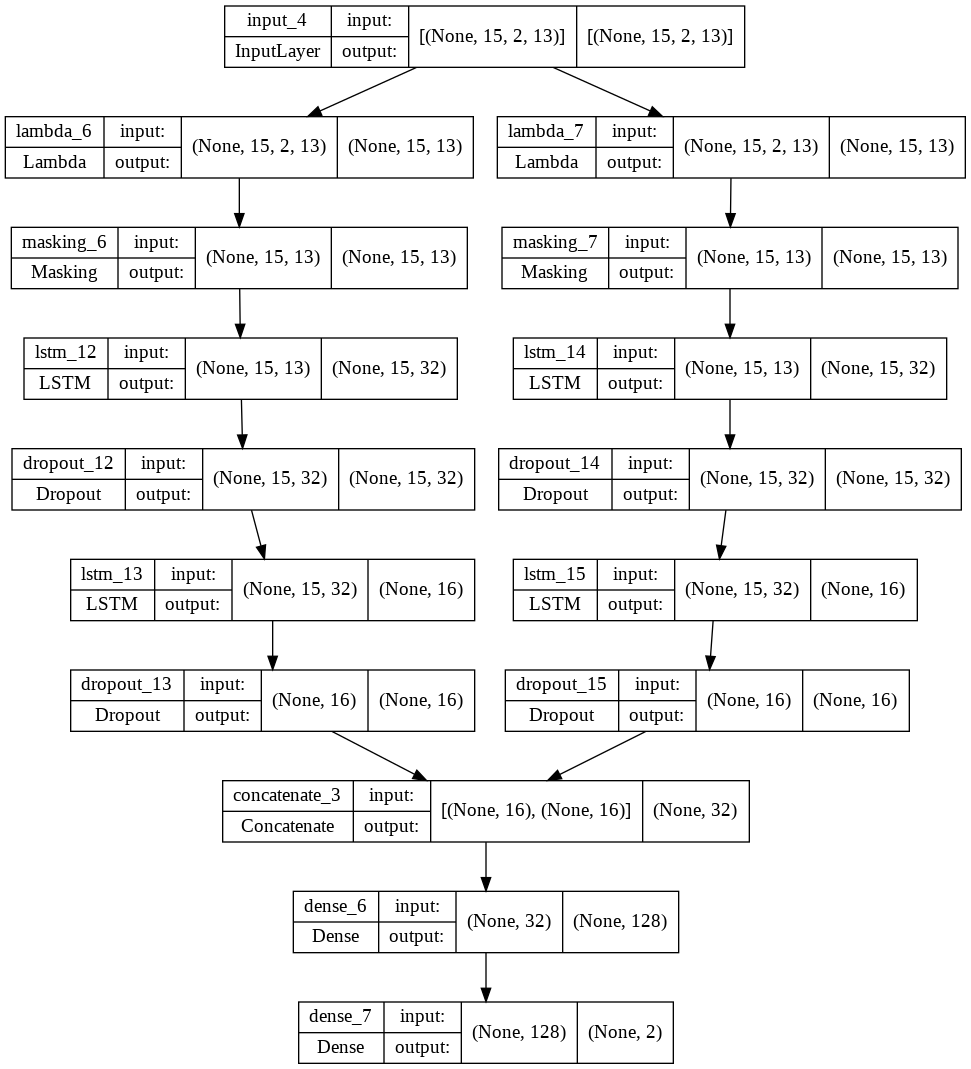

In [236]:
#example with 2 assets for visibility
tf.keras.utils.plot_model(get_model(n_assets=2), show_shapes=True)

**Training/Fitting time**

We can finally train our model with our training data. Let's see how it does.

In [237]:
tf.random.set_seed(10)

estop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min',restore_best_weights=True)
scheduler = keras.optimizers.schedules.ExponentialDecay(1e-3, (0.5*len(X_train)/BATCH_SIZE), 1e-3)
lr = keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)
    
history = lstm_model.fit(train_values_get, validation_data = (validation_values_get), epochs = 10, callbacks = [lr])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/10
333/333 [==============================] - 26s 37ms/step - loss: 0.0087 - Correlation: 0.0435 - val_loss: 0.0016 - val_Correlation: 0.0621 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009593124850653112.
Epoch 2/10
333/333 [==============================] - 8s 23ms/step - loss: 0.0021 - Correlation: 0.0430 - val_loss: 0.0013 - val_Correlation: 0.0778 - lr: 9.5931e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000920280406717211.
Epoch 3/10
333/333 [==============================] - 7s 22ms/step - loss: 0.0022 - Correlation: 0.0436 - val_loss: 0.0016 - val_Correlation: 0.0701 - lr: 9.2028e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0008828364661894739.
Epoch 4/10
333/333 [==============================] - 8s 23ms/step - loss: 0.0021 - Correlation: 0.0456 - val_loss: 0.0011 - val_Correlation: 0.0655 - lr: 8.8284e-04

Epoch 5: LearningRa

**Plotting model accuracy and loss**

This step is very important since it allows you to see if your model is performing well as you train it. If it isn't, you will rather have to create new features, tune hyperparameters or modify the RNN network

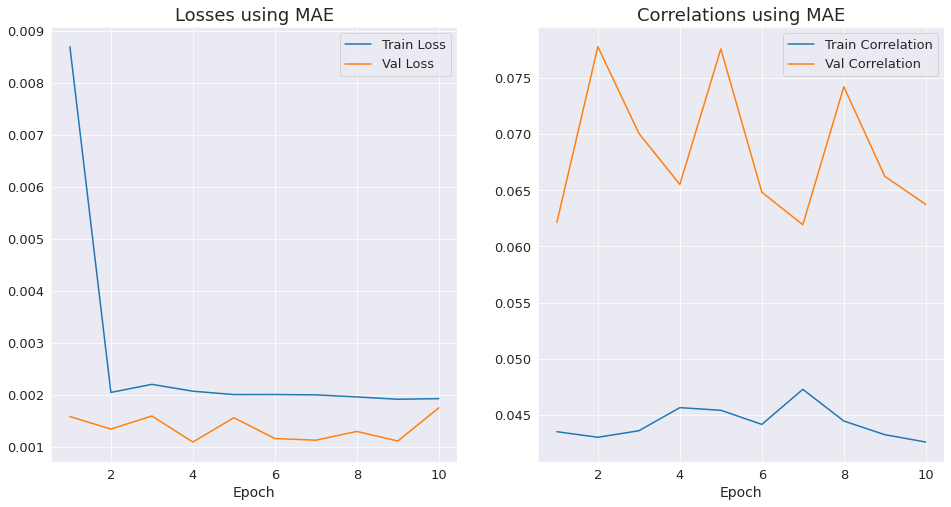

In [239]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

histories = pd.DataFrame(history.history)

epochs = list(range(1,len(histories)+1))
loss = histories['loss']
val_loss = histories['val_loss']
Correlation = histories['Correlation']
val_Correlation = histories['val_Correlation']

ax[0].plot(epochs, loss, label = 'Train Loss')
ax[0].plot(epochs, val_loss, label = 'Val Loss')
ax[0].set_title('Losses using MAE')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper right')

ax[1].plot(epochs, Correlation, label = 'Train Correlation')
ax[1].plot(epochs, val_Correlation, label = 'Val Correlation')
ax[1].set_title('Correlations using MAE')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper right')

fig.show()

**Using Cosine Similarity**

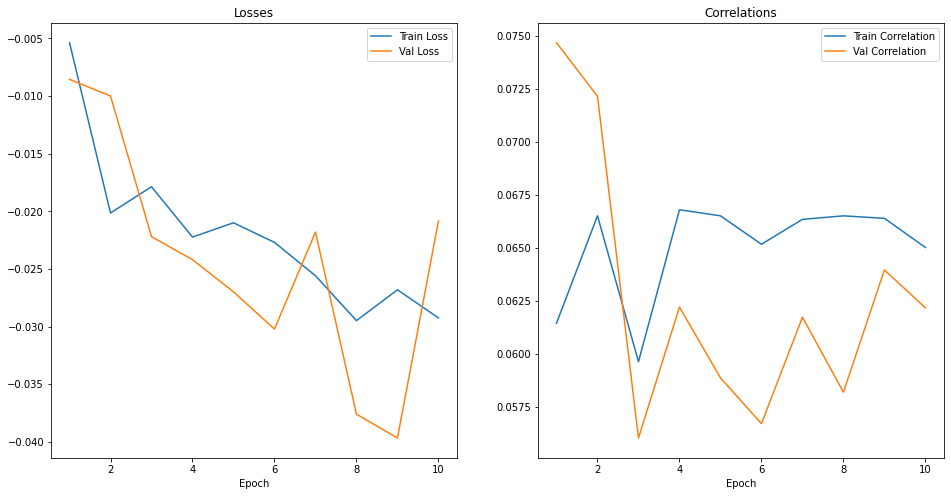

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

histories = pd.DataFrame(history.history)

epochs = list(range(1,len(histories)+1))
loss = histories['loss']
val_loss = histories['val_loss']
Correlation = histories['Correlation']
val_Correlation = histories['val_Correlation']

ax[0].plot(epochs, loss, label = 'Train Loss')
ax[0].plot(epochs, val_loss, label = 'Val Loss')
ax[0].set_title('Losses')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper right')

ax[1].plot(epochs, Correlation, label = 'Train Correlation')
ax[1].plot(epochs, val_Correlation, label = 'Val Correlation')
ax[1].set_title('Correlations')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='upper right')

fig.show()

In [ ]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
colors = sns.color_palette('pastel') # Color palette to use
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

def plot_loss(history):
    fig, ax = plt.subplots(figsize=(10,6), tight_layout=True)
    ax.plot(history.history['loss'], 'o-', color="#004C99", linewidth=2)
    ax.plot(history.history['val_loss'], 'o-', color="#D96552",linewidth=2)
    ax.set_facecolor(colors[-1])
    plt.grid(b=True,axis = 'y')
    ax.grid(b=True,axis = 'y')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right',prop={'size': 15})
    plt.title('Plotting Loss of LSTM Model')
    plt.show()
    
def plot_future(prediction, y_test):
    fig, ax = plt.subplots(figsize=(10,6), tight_layout=True)
    range_future = len(prediction)
    ax.plot(np.arange(range_future), np.array(y_test),label='Actual',color="#004C99")
    ax.plot(np.arange(range_future),np.array(prediction),label='Prediction',color="#D96552")
    ax.set_facecolor(colors[-1])
    plt.grid(b=True,axis = 'y')
    ax.grid(b=True,axis = 'y')
    plt.ylabel('USD')
    plt.legend(loc='upper left',prop={'size': 15})
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)   
    plt.show()

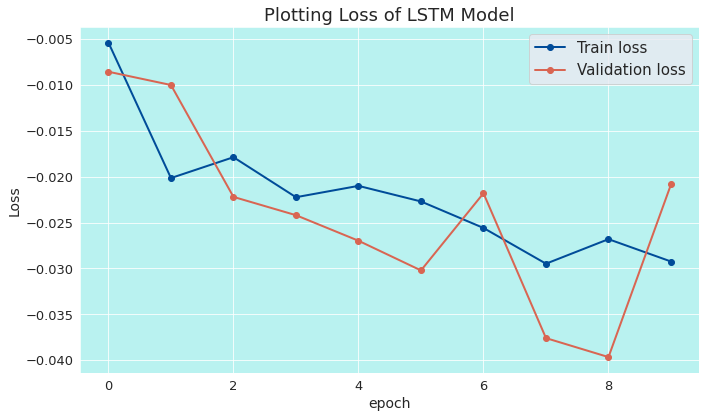

In [ ]:
plot_loss(history)

In [ ]:
def regression_metrics(y_test, y_pred):
    """Function which contains differents metrics about regression
    Input: y_test, prediction
    
    Output: MAE, MSE, RMSE & MAPE 
    """
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("MAE: ",mae.round(5))
    print("MSE: ", mse.round(5))
    print("RMSE: ", rmse)
    print("MAPE: ", mape.round(5))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error